In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import librosa as lr
import os
from IPython.display import Audio
from scipy.fftpack import fft, rfft
from scipy import stats
from librosa.core import piptrack
from scipy.stats.mstats import gmean
import amfm_decompy.pYAAPT as pYAAPT
import amfm_decompy.basic_tools as basic

In [2]:
data_dir = os.getcwd()
audio_files = glob(data_dir + '\\*.wav')

In [3]:
len(audio_files)

20

In [4]:
audio_files[1]

'C:\\Users\\user\\Downloads\\Data Analytics\\Directory\\week8\\Project-Week-8-Final-Project\\Draft\\idea2\\f11.wav'

In [5]:
audio, sfreq = lr.load(audio_files[1])
time = np.arange(0, len(audio)) / sfreq

In [6]:
time

array([0.00000000e+00, 4.53514739e-05, 9.07029478e-05, ...,
       3.15986395e+00, 3.15990930e+00, 3.15995465e+00])

In [7]:
for file in range(0, len(audio_files), 1):
    print(audio_files[file])

C:\Users\user\Downloads\Data Analytics\Directory\week8\Project-Week-8-Final-Project\Draft\idea2\f1.wav
C:\Users\user\Downloads\Data Analytics\Directory\week8\Project-Week-8-Final-Project\Draft\idea2\f11.wav
C:\Users\user\Downloads\Data Analytics\Directory\week8\Project-Week-8-Final-Project\Draft\idea2\f2.wav
C:\Users\user\Downloads\Data Analytics\Directory\week8\Project-Week-8-Final-Project\Draft\idea2\f21.wav
C:\Users\user\Downloads\Data Analytics\Directory\week8\Project-Week-8-Final-Project\Draft\idea2\f3.wav
C:\Users\user\Downloads\Data Analytics\Directory\week8\Project-Week-8-Final-Project\Draft\idea2\f31.wav
C:\Users\user\Downloads\Data Analytics\Directory\week8\Project-Week-8-Final-Project\Draft\idea2\f4.wav
C:\Users\user\Downloads\Data Analytics\Directory\week8\Project-Week-8-Final-Project\Draft\idea2\f41.wav
C:\Users\user\Downloads\Data Analytics\Directory\week8\Project-Week-8-Final-Project\Draft\idea2\f5.wav
C:\Users\user\Downloads\Data Analytics\Directory\week8\Project-Week-8

In [8]:
# for file in range(0, len(audio_files), 1):
#     audio, sfreq = lr.load(audio_files[file])
#     Audio(audio, rate=sfreq)

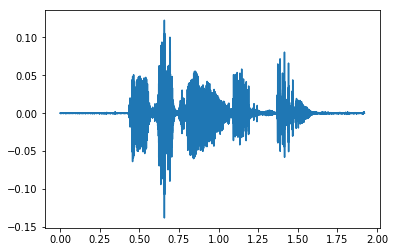

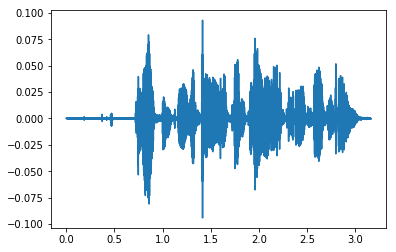

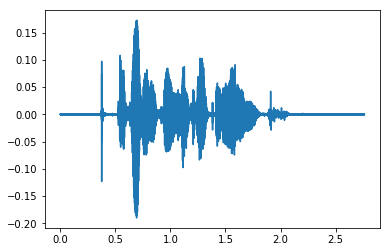

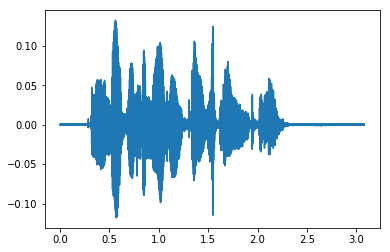

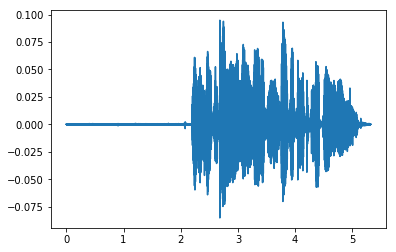

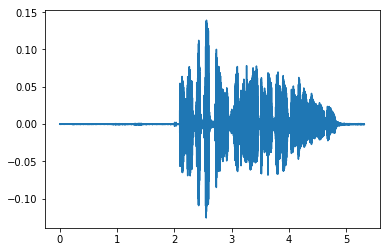

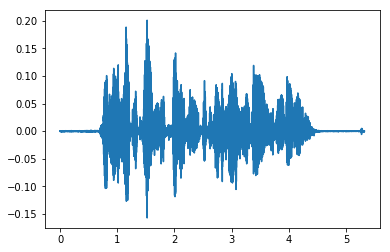

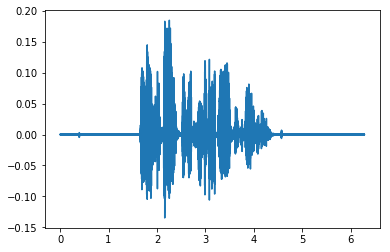

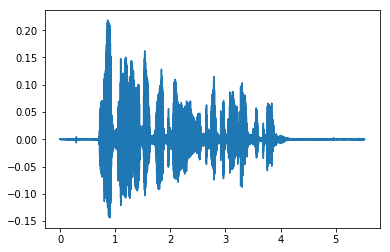

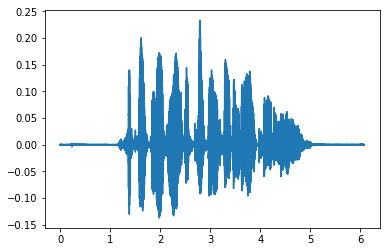

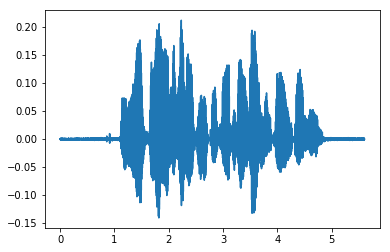

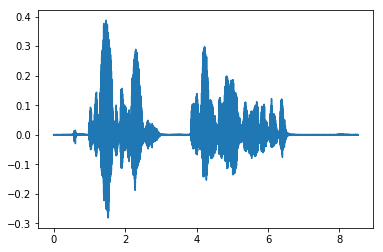

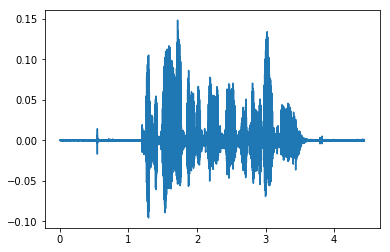

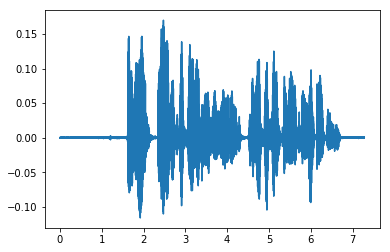

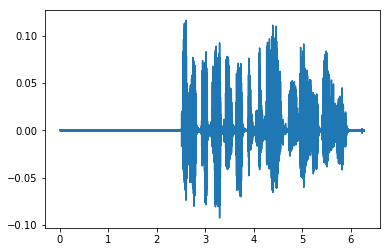

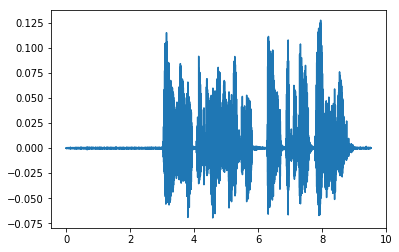

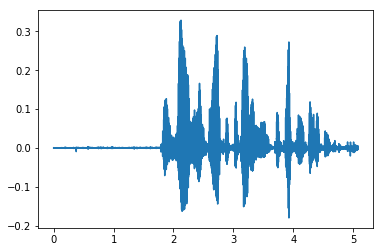

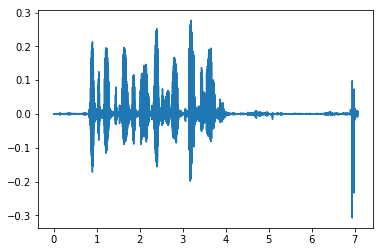

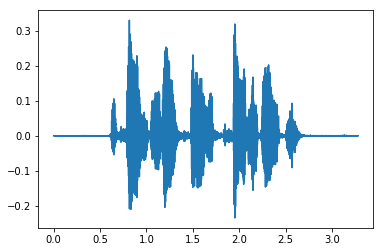

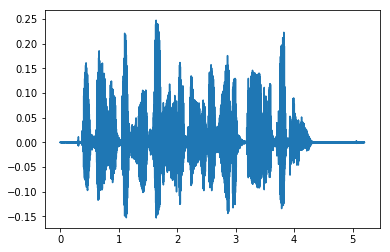

In [9]:
for file in range(0, len(audio_files), 1):
    audio, sfreq = lr.load(audio_files[file])
    time = np.arange(0, len(audio)) / sfreq
    plt.plot(time, audio)
    plt.show()

In [10]:
# #    Load the audio as a waveform 'audi'
# #    Store the sampling rate as 'sfreq'
# #    Discrete Fourier transform of a real sequence.
# #    DFT sample frequencies (for usage with rfft, irfft).


# for file in range(0, len(audio_files), 1):
#     audio, sfreq = lr.load(audio_files[file])
#     ft = rfft(audio)
#     plt.plot(abs(ft))
#     plt.show()
#     print(sfreq)
#     print(abs(ft))
#     print(f'The mean: {np.mean(abs(ft))}')
#     print(f'The STD: {np.std(abs(ft))}')
#     print(f'The median: {np.median(abs(ft))}')
#     print(f'The 25% percentile: {np.percentile(abs(ft), 50)}')
#     print(f'The 75% percentile: {np.percentile(abs(ft), 75)}')
#     print(f'The IQR: {stats.iqr(abs(ft))}')
#     print(len(ft))

In [11]:
def spectral_properties(y: np.ndarray, fs: int) -> dict:
    spec = np.abs(np.fft.rfft(y))
    freq = np.fft.rfftfreq(len(y), d=1 / fs)
    spec = np.abs(spec)
    amp = spec / spec.sum()
    mean = (freq * amp).sum()
    sd = np.sqrt(np.sum(amp * ((freq - mean) ** 2)))
    amp_cumsum = np.cumsum(amp)
    median = freq[len(amp_cumsum[amp_cumsum <= 0.5]) + 1]
    mode = freq[amp.argmax()]
    Q25 = freq[len(amp_cumsum[amp_cumsum <= 0.25]) + 1]
    Q75 = freq[len(amp_cumsum[amp_cumsum <= 0.75]) + 1]
    IQR = Q75 - Q25
    z = amp - amp.mean()
    w = amp.std()
    skew = ((z ** 3).sum() / (len(spec) - 1)) / w ** 3
    kurt = ((z ** 4).sum() / (len(spec) - 1)) / w ** 4
    #cent = lr.feature.spectral_centroid(y=y, sr=fs)
    #cent = np.sum(spec*freq) / np.sum(spec)
    #spectral_flatness = lr.feature.spectral_flatness(y=y)
    #spectral_flatness = (gmean(spec * spec))/(np.mean(spec * spec))
    #mean_dfreq = np.mean(amp)
    #max_dfreq = np.max(amp)
    #min_dfreq = np.min(amp)
    #pitches, magnitudes = piptrack(y=y, sr=fs, fmax = 280)
    #pitches, magnitudes = piptrack(y=y, sr=fs)


    result_d = {
        'Mean_freq': mean/1000,
        'Std': sd/1000,
        'Median_freq': median/1000,
        'Mode_freq': mode/1000,
        'First_quartile': Q25/1000,
        'Third_quartile': Q75/1000,
        'Interquantile_range': IQR/1000,
        'Skewness': skew,
        'Kurtosis': kurt,
        #'Centroid_freq': np.mean(cent)/1000,
        #'Centroid_freq': cent/1000,
        #'Spectral_flatness_measure': np.mean(spectral_flatness),
        #'Spectral_flatness_measure': spectral_flatness
        #'Mean_dominant_freq': mean_dfreq,
        #'Max_dominant_freq': max_dfreq,
        #'Min_dominant_freq':min_dfreq
        #'Mean_fundamental_freq': np.mean(pitches)
    }

    return result_d

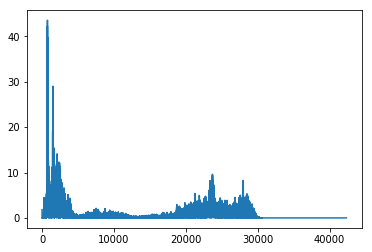

C:\Users\user\Downloads\Data Analytics\Directory\week8\Project-Week-8-Final-Project\Draft\idea2\f1.wav
{'Mean_freq': 3.580407955474014, 'Std': 2.8214119061216767, 'Median_freq': 4.322916666666667, 'Mode_freq': 0.19583333333333333, 'First_quartile': 0.5453125, 'Third_quartile': 6.201041666666667, 'Interquantile_range': 5.655729166666667, 'Skewness': 6.608437432396196, 'Kurtosis': 78.82903889264081}
###########################################################################################################


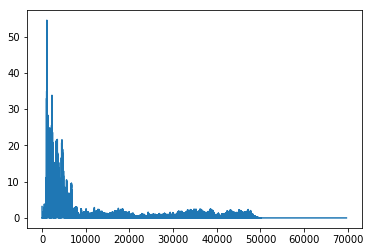

C:\Users\user\Downloads\Data Analytics\Directory\week8\Project-Week-8-Final-Project\Draft\idea2\f11.wav
{'Mean_freq': 2.1194696029871567, 'Std': 2.328047013508857, 'Median_freq': 0.7917721518987342, 'Mode_freq': 0.17341772151898732, 'First_quartile': 0.3810126582278481, 'Third_quartile': 3.8034810126582275, 'Interquantile_range': 3.4224683544303796, 'Skewness': 6.445446815306507, 'Kurtosis': 65.00249131575396}
###########################################################################################################


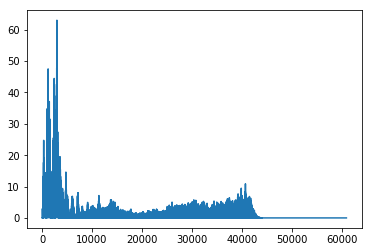

C:\Users\user\Downloads\Data Analytics\Directory\week8\Project-Week-8-Final-Project\Draft\idea2\f2.wav
{'Mean_freq': 2.802521139723995, 'Std': 2.6530157612541836, 'Median_freq': 1.59963768115942, 'Mode_freq': 0.5347826086956521, 'First_quartile': 0.46811594202898543, 'Third_quartile': 5.43659420289855, 'Interquantile_range': 4.968478260869565, 'Skewness': 7.3747683050985655, 'Kurtosis': 80.1011050513865}
###########################################################################################################


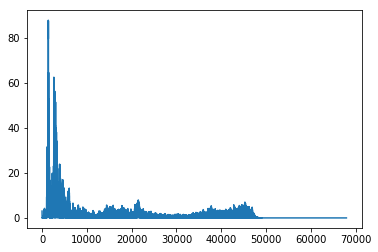

C:\Users\user\Downloads\Data Analytics\Directory\week8\Project-Week-8-Final-Project\Draft\idea2\f21.wav
{'Mean_freq': 2.498870953206097, 'Std': 2.4552244304133186, 'Median_freq': 1.2016233766233766, 'Mode_freq': 0.2272727272727273, 'First_quartile': 0.47435064935064936, 'Third_quartile': 3.937337662337662, 'Interquantile_range': 3.462987012987013, 'Skewness': 7.248644736983515, 'Kurtosis': 73.1735079612425}
###########################################################################################################


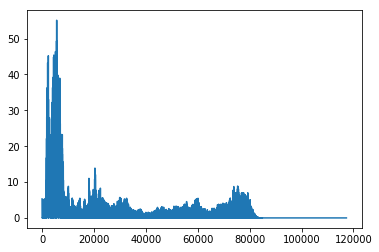

C:\Users\user\Downloads\Data Analytics\Directory\week8\Project-Week-8-Final-Project\Draft\idea2\f3.wav
{'Mean_freq': 2.5080547107857365, 'Std': 2.508455224882371, 'Median_freq': 1.1796992481203006, 'Mode_freq': 0.5257518796992481, 'First_quartile': 0.4781954887218045, 'Third_quartile': 4.775375939849624, 'Interquantile_range': 4.2971804511278195, 'Skewness': 5.104057029321761, 'Kurtosis': 35.190929384944575}
###########################################################################################################


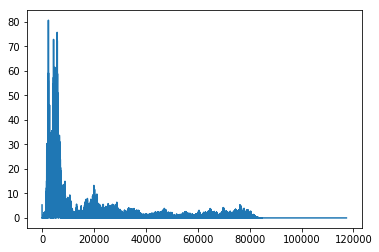

C:\Users\user\Downloads\Data Analytics\Directory\week8\Project-Week-8-Final-Project\Draft\idea2\f31.wav
{'Mean_freq': 2.04418373823813, 'Std': 2.214475127719999, 'Median_freq': 0.8073308270676691, 'Mode_freq': 0.22969924812030076, 'First_quartile': 0.4610902255639098, 'Third_quartile': 2.981954887218045, 'Interquantile_range': 2.520864661654135, 'Skewness': 6.629901801537923, 'Kurtosis': 61.17727039308845}
###########################################################################################################


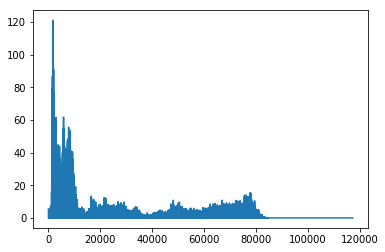

C:\Users\user\Downloads\Data Analytics\Directory\week8\Project-Week-8-Final-Project\Draft\idea2\f4.wav
{'Mean_freq': 2.7305675218302996, 'Std': 2.549111317539524, 'Median_freq': 1.5951127819548871, 'Mode_freq': 0.175, 'First_quartile': 0.5571428571428572, 'Third_quartile': 5.0851503759398495, 'Interquantile_range': 4.528007518796993, 'Skewness': 5.551654204291163, 'Kurtosis': 51.93387238627189}
###########################################################################################################


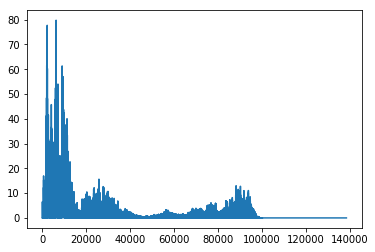

C:\Users\user\Downloads\Data Analytics\Directory\week8\Project-Week-8-Final-Project\Draft\idea2\f41.wav
{'Mean_freq': 2.419767605305091, 'Std': 2.5211324541296514, 'Median_freq': 1.0377388535031846, 'Mode_freq': 0.5100318471337579, 'First_quartile': 0.5305732484076433, 'Third_quartile': 4.212420382165605, 'Interquantile_range': 3.6818471337579615, 'Skewness': 5.201807906020913, 'Kurtosis': 40.960358555803545}
###########################################################################################################


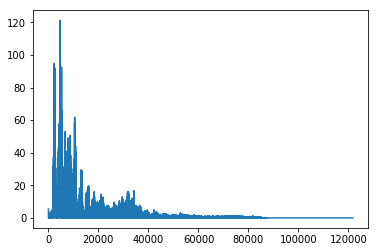

C:\Users\user\Downloads\Data Analytics\Directory\week8\Project-Week-8-Final-Project\Draft\idea2\f5.wav
{'Mean_freq': 1.5318591045520573, 'Std': 1.458418027046264, 'Median_freq': 0.9617753623188404, 'Mode_freq': 0.4215579710144927, 'First_quartile': 0.4759057971014492, 'Third_quartile': 2.190579710144927, 'Interquantile_range': 1.7146739130434778, 'Skewness': 5.9843947909205095, 'Kurtosis': 53.75979311784975}
###########################################################################################################


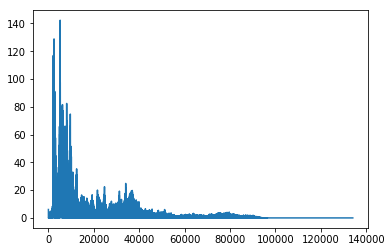

C:\Users\user\Downloads\Data Analytics\Directory\week8\Project-Week-8-Final-Project\Draft\idea2\f51.wav
{'Mean_freq': 1.7251215029377762, 'Std': 1.6740392727495925, 'Median_freq': 0.9432565789473685, 'Mode_freq': 0.42828947368421055, 'First_quartile': 0.5113486842105264, 'Third_quartile': 2.653947368421053, 'Interquantile_range': 2.142598684210527, 'Skewness': 5.930367998579431, 'Kurtosis': 54.43195234752486}
###########################################################################################################


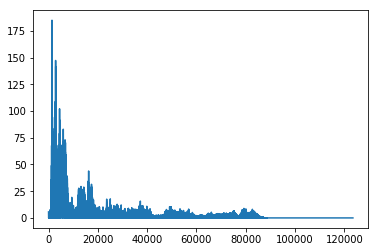

C:\Users\user\Downloads\Data Analytics\Directory\week8\Project-Week-8-Final-Project\Draft\idea2\m1.wav
{'Mean_freq': 2.0228443665663183, 'Std': 2.1064444081866527, 'Median_freq': 1.1803571428571427, 'Mode_freq': 0.12517857142857142, 'First_quartile': 0.43660714285714275, 'Third_quartile': 3.1217857142857137, 'Interquantile_range': 2.685178571428571, 'Skewness': 6.936936248973346, 'Kurtosis': 76.6916841428043}
###########################################################################################################


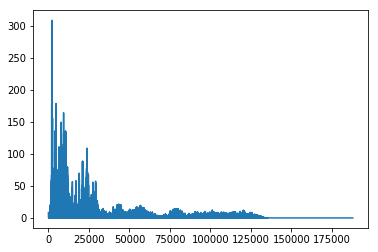

C:\Users\user\Downloads\Data Analytics\Directory\week8\Project-Week-8-Final-Project\Draft\idea2\m11.wav
{'Mean_freq': 1.9922351740668205, 'Std': 2.01210611753326, 'Median_freq': 1.2862676056338027, 'Mode_freq': 0.13826291079812209, 'First_quartile': 0.4800469483568075, 'Third_quartile': 2.870892018779343, 'Interquantile_range': 2.390845070422535, 'Skewness': 5.856526343502835, 'Kurtosis': 56.25108297801868}
###########################################################################################################


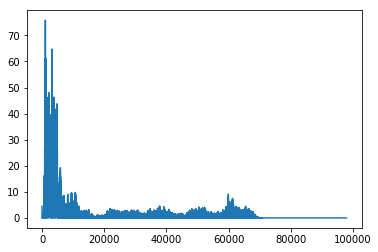

C:\Users\user\Downloads\Data Analytics\Directory\week8\Project-Week-8-Final-Project\Draft\idea2\m2.wav
{'Mean_freq': 2.213913277570336, 'Std': 2.4896723418266222, 'Median_freq': 0.6686936936936936, 'Mode_freq': 0.12049549549549547, 'First_quartile': 0.3193693693693693, 'Third_quartile': 4.211486486486486, 'Interquantile_range': 3.8921171171171163, 'Skewness': 6.511926819023207, 'Kurtosis': 57.52891654076215}
###########################################################################################################


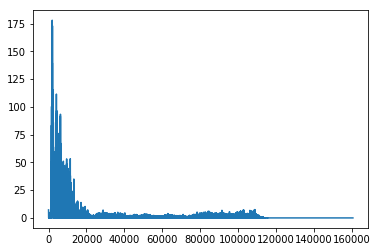

C:\Users\user\Downloads\Data Analytics\Directory\week8\Project-Week-8-Final-Project\Draft\idea2\m21.wav
{'Mean_freq': 1.841137103392129, 'Std': 2.3311019004613014, 'Median_freq': 0.6548076923076923, 'Mode_freq': 0.1416208791208791, 'First_quartile': 0.28887362637362635, 'Third_quartile': 2.5163461538461536, 'Interquantile_range': 2.227472527472527, 'Skewness': 7.190153032916238, 'Kurtosis': 79.76372213319061}
###########################################################################################################


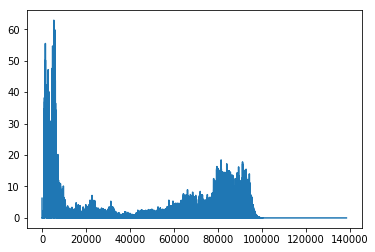

C:\Users\user\Downloads\Data Analytics\Directory\week8\Project-Week-8-Final-Project\Draft\idea2\m3.wav
{'Mean_freq': 3.5541575984370066, 'Std': 2.874676971491309, 'Median_freq': 3.8552547770700634, 'Mode_freq': 0.42595541401273884, 'First_quartile': 0.4447452229299363, 'Third_quartile': 6.485509554140127, 'Interquantile_range': 6.040764331210191, 'Skewness': 4.948016330720082, 'Kurtosis': 38.20024319163427}
###########################################################################################################


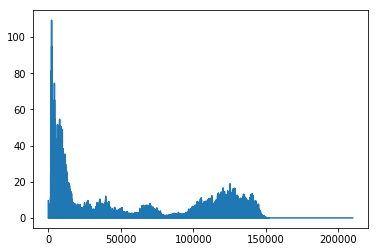

C:\Users\user\Downloads\Data Analytics\Directory\week8\Project-Week-8-Final-Project\Draft\idea2\m31.wav
{'Mean_freq': 3.0157199949639573, 'Std': 2.7237150019995577, 'Median_freq': 1.9523109243697478, 'Mode_freq': 0.11953781512605041, 'First_quartile': 0.44821428571428573, 'Third_quartile': 6.004516806722689, 'Interquantile_range': 5.556302521008404, 'Skewness': 5.089346895926883, 'Kurtosis': 43.19783774436792}
###########################################################################################################


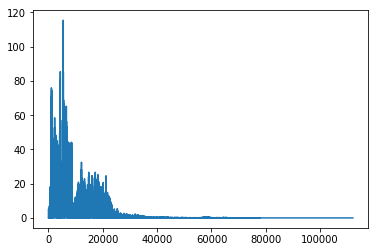

C:\Users\user\Downloads\Data Analytics\Directory\week8\Project-Week-8-Final-Project\Draft\idea2\m4.wav
{'Mean_freq': 1.0456631326307246, 'Std': 0.8621978096367011, 'Median_freq': 0.7533464566929133, 'Mode_freq': 0.5397637795275589, 'First_quartile': 0.427755905511811, 'Third_quartile': 1.5438976377952753, 'Interquantile_range': 1.1161417322834646, 'Skewness': 4.955950878233973, 'Kurtosis': 37.69945444980226}
###########################################################################################################


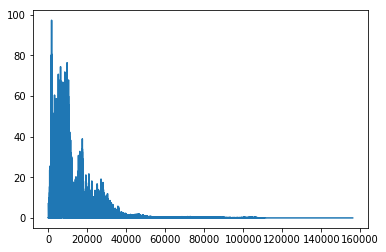

C:\Users\user\Downloads\Data Analytics\Directory\week8\Project-Week-8-Final-Project\Draft\idea2\m41.wav
{'Mean_freq': 1.011357711816782, 'Std': 0.9501042140254806, 'Median_freq': 0.6988700564971752, 'Mode_freq': 0.11751412429378531, 'First_quartile': 0.432909604519774, 'Third_quartile': 1.3207627118644067, 'Interquantile_range': 0.8878531073446329, 'Skewness': 4.447911029025846, 'Kurtosis': 27.95607182905823}
###########################################################################################################


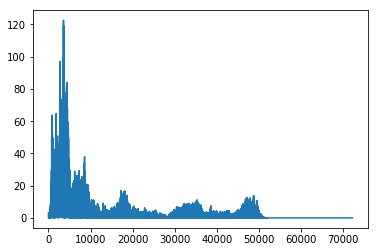

C:\Users\user\Downloads\Data Analytics\Directory\week8\Project-Week-8-Final-Project\Draft\idea2\m5.wav
{'Mean_freq': 2.2596012656603963, 'Std': 2.305518458375743, 'Median_freq': 1.1164634146341463, 'Mode_freq': 0.55, 'First_quartile': 0.5411585365853658, 'Third_quartile': 3.517987804878049, 'Interquantile_range': 2.976829268292683, 'Skewness': 4.979920318381361, 'Kurtosis': 37.90056905077212}
###########################################################################################################


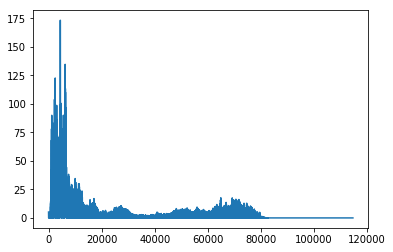

C:\Users\user\Downloads\Data Analytics\Directory\week8\Project-Week-8-Final-Project\Draft\idea2\m51.wav
{'Mean_freq': 2.2859059279115073, 'Std': 2.4727717916296736, 'Median_freq': 0.9144230769230768, 'Mode_freq': 0.4261538461538461, 'First_quartile': 0.4298076923076923, 'Third_quartile': 4.531153846153845, 'Interquantile_range': 4.101346153846153, 'Skewness': 5.406641085115678, 'Kurtosis': 42.583161232272666}
###########################################################################################################


In [12]:
list_of_dict = []
for file in range(0, len(audio_files), 1):
    audio, sfreq = lr.load(audio_files[file])
    ft = rfft(audio)
    plt.plot(abs(ft))
    plt.show()
    print(audio_files[file])
    dictionary_of_features = spectral_properties(audio, sfreq)
    #signal = basic.SignalObj(audio_files[file])
    #pitch = pYAAPT.yaapt(signal)
    #dictionary_of_features['Mean_fundamental_freq'] = ((np.nanmean(pitch.samp_values))/(len(audio)))/1000
    #dictionary_of_features['Max_fundamental_freq'] = np.nanmax(pitch.samp_values)/1000
    print(dictionary_of_features)
    list_of_dict.append(dictionary_of_features)
    print('###########################################################################################################')

In [13]:
list_of_dict

[{'Mean_freq': 3.580407955474014,
  'Std': 2.8214119061216767,
  'Median_freq': 4.322916666666667,
  'Mode_freq': 0.19583333333333333,
  'First_quartile': 0.5453125,
  'Third_quartile': 6.201041666666667,
  'Interquantile_range': 5.655729166666667,
  'Skewness': 6.608437432396196,
  'Kurtosis': 78.82903889264081},
 {'Mean_freq': 2.1194696029871567,
  'Std': 2.328047013508857,
  'Median_freq': 0.7917721518987342,
  'Mode_freq': 0.17341772151898732,
  'First_quartile': 0.3810126582278481,
  'Third_quartile': 3.8034810126582275,
  'Interquantile_range': 3.4224683544303796,
  'Skewness': 6.445446815306507,
  'Kurtosis': 65.00249131575396},
 {'Mean_freq': 2.802521139723995,
  'Std': 2.6530157612541836,
  'Median_freq': 1.59963768115942,
  'Mode_freq': 0.5347826086956521,
  'First_quartile': 0.46811594202898543,
  'Third_quartile': 5.43659420289855,
  'Interquantile_range': 4.968478260869565,
  'Skewness': 7.3747683050985655,
  'Kurtosis': 80.1011050513865},
 {'Mean_freq': 2.498870953206097,

In [14]:
new_voices = pd.DataFrame(list_of_dict)

In [15]:
new_voices

,First_quartile,Interquantile_range,Kurtosis,Mean_freq,Median_freq,Mode_freq,Skewness,Std,Third_quartile
0,0.545312,5.655729,78.829039,3.580408,4.322917,0.195833,6.608437,2.821412,6.201042
1,0.381013,3.422468,65.002491,2.119470,0.791772,0.173418,6.445447,2.328047,3.803481
2,0.468116,4.968478,80.101105,2.802521,1.599638,0.534783,7.374768,2.653016,5.436594
3,0.474351,3.462987,73.173508,2.498871,1.201623,0.227273,7.248645,2.455224,3.937338
4,0.478195,4.297180,35.190929,2.508055,1.179699,0.525752,5.104057,2.508455,4.775376
5,0.461090,2.520865,61.177270,2.044184,0.807331,0.229699,6.629902,2.214475,2.981955
6,0.557143,4.528008,51.933872,2.730568,1.595113,0.175000,5.551654,2.549111,5.085150
7,0.530573,3.681847,40.960359,2.419768,1.037739,0.510032,5.201808,2.521132,4.212420
8,0.475906,1.714674,53.759793,1.531859,0.961775,0.421558,5.984395,1.458418,2.190580
9,0.511349,2.142599,54.431952,1.725122,0.943257,0.428289,5.930368,1.674039,2.653947


In [16]:
new_voices['Gender'] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [17]:
new_voices

,First_quartile,Interquantile_range,Kurtosis,Mean_freq,Median_freq,Mode_freq,Skewness,Std,Third_quartile,Gender
0,0.545312,5.655729,78.829039,3.580408,4.322917,0.195833,6.608437,2.821412,6.201042,0
1,0.381013,3.422468,65.002491,2.119470,0.791772,0.173418,6.445447,2.328047,3.803481,0
2,0.468116,4.968478,80.101105,2.802521,1.599638,0.534783,7.374768,2.653016,5.436594,0
3,0.474351,3.462987,73.173508,2.498871,1.201623,0.227273,7.248645,2.455224,3.937338,0
4,0.478195,4.297180,35.190929,2.508055,1.179699,0.525752,5.104057,2.508455,4.775376,0
5,0.461090,2.520865,61.177270,2.044184,0.807331,0.229699,6.629902,2.214475,2.981955,0
6,0.557143,4.528008,51.933872,2.730568,1.595113,0.175000,5.551654,2.549111,5.085150,0
7,0.530573,3.681847,40.960359,2.419768,1.037739,0.510032,5.201808,2.521132,4.212420,0
8,0.475906,1.714674,53.759793,1.531859,0.961775,0.421558,5.984395,1.458418,2.190580,0
9,0.511349,2.142599,54.431952,1.725122,0.943257,0.428289,5.930368,1.674039,2.653947,0


In [18]:
new_voices.to_csv('voices_to_test.csv', index=False)

In [19]:
# for file in range(0, len(audio_files), 1):
#     signal = basic.SignalObj(audio_files[file])
#     pitch = pYAAPT.yaapt(signal)
#     print(audio_files[file])
#     #print(np.nanmean(pitch.values_interp)/1000)
#     print(np.mean(pitch.values))
#     print(np.mean(pitch.samp_values))
#     print(np.mean(pitch.values_interp))
#     print(np.mean(pitch.samp_interp))
#     fig, ax = plt.subplots(figsize=(12, 8))
#     #ax.plot(pitch.samp_values, label='YAAPT', color='blue')
#     #ax.plot(pitch.samp_interp, label='YAAPT_interpolated', color='red')
#     ax.plot(pitch.values, label='YAAPT', color='blue')
#     ax.plot(pitch.values_interp, label='YAAPT_interpolated', color='red')
#     ax.legend(loc="upper right")
#     plt.show()

In [20]:
for file in range(0, len(audio_files), 1):
    audio, sfreq = lr.load(audio_files[file])
    pitches, magnitudes = piptrack(y=audio, sr=sfreq, fmax = 280)
    print(audio_files[file])
    print(np.mean(pitches))
    print(np.mean(magnitudes))
#     fig, ax = plt.subplots(figsize=(12, 8))
#     ax.plot(np.nonzero(pitches), label='pitches', color='blue')
#     ax.set_xlim(0, 50)
#     ax.legend(loc="upper right")
#     plt.show()

C:\Users\user\Downloads\Data Analytics\Directory\week8\Project-Week-8-Final-Project\Draft\idea2\f1.wav
0.543603
0.003423612
C:\Users\user\Downloads\Data Analytics\Directory\week8\Project-Week-8-Final-Project\Draft\idea2\f11.wav
0.47555262
0.0034024098
C:\Users\user\Downloads\Data Analytics\Directory\week8\Project-Week-8-Final-Project\Draft\idea2\f2.wav
0.5064111
0.0032499728
C:\Users\user\Downloads\Data Analytics\Directory\week8\Project-Week-8-Final-Project\Draft\idea2\f21.wav
0.46277887
0.004478059
C:\Users\user\Downloads\Data Analytics\Directory\week8\Project-Week-8-Final-Project\Draft\idea2\f3.wav
0.5149132
0.0026694522
C:\Users\user\Downloads\Data Analytics\Directory\week8\Project-Week-8-Final-Project\Draft\idea2\f31.wav
0.5108766
0.002927712
C:\Users\user\Downloads\Data Analytics\Directory\week8\Project-Week-8-Final-Project\Draft\idea2\f4.wav
0.52681553
0.0049864803
C:\Users\user\Downloads\Data Analytics\Directory\week8\Project-Week-8-Final-Project\Draft\idea2\f41.wav
0.59951574
0